# Project Titan X-AI Assistant for Stock Investing
# AIDI-2005-01 - CAPSTONE TERM II-Final
# Team: KENG HIN CHEONG, AU QUANG LOC NGUYEN, CHUTU LI

# *Stock Price Prediction-Short Term*



## Install pyFTS library

In [1]:
#!pip3 install -U git+https://github.com/PYFTS/pyFTS

## imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt

## Getting the data

In [2]:
from yahoo_fin import stock_info as si
import pandas_datareader.data as web
import pandas as pd

data = web.get_data_yahoo('aapl','3/3/2018','4/15/2020',)
data.reset_index(inplace=True,drop=False)

In [3]:
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-03-05,177.740005,174.520004,175.210007,176.820007,28401400.0,171.917709
1,2018-03-06,178.250000,176.130005,177.910004,176.669998,23788500.0,171.771851
2,2018-03-07,175.850006,174.270004,174.940002,175.029999,31703500.0,170.177322
3,2018-03-08,177.119995,175.070007,175.479996,176.940002,23774100.0,172.034363
4,2018-03-09,180.000000,177.389999,177.960007,179.979996,32185200.0,174.990051
...,...,...,...,...,...,...,...
528,2020-04-08,267.369995,261.230011,262.739990,266.070007,42223800.0,266.070007
529,2020-04-09,270.070007,264.700012,268.700012,267.989990,40529100.0,267.989990
530,2020-04-13,273.700012,265.829987,268.309998,273.250000,32755700.0,273.250000
531,2020-04-14,288.250000,278.049988,280.000000,287.049988,48748700.0,287.049988


## Data Preprocessing

Defining the number of days based on the number of rows

In [5]:
data['days'] = range(len(data))

In [6]:
data = data.drop(columns= ['Date', 'Close', 'High', 'Low', 'Open', 'Volume'])

Using only the ADJ close

In [7]:
data

,Adj Close,days
0,171.917709,0
1,171.771851,1
2,170.177322,2
3,172.034363,3
4,174.990051,4
...,...,...
527,259.429993,527
528,266.070007,528
529,267.989990,529
530,273.250000,530


How the time serie looks

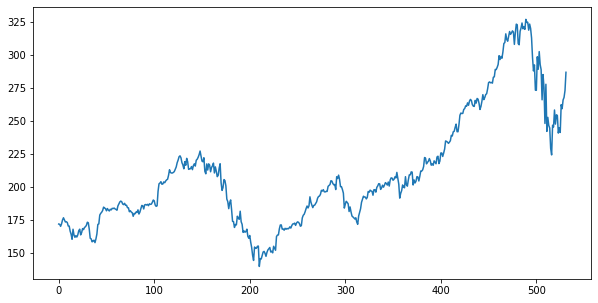

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,5])
plt.plot(data['days'],data['Adj Close'])
data = data['Adj Close'].values

## 1. Definition of the Universe of Discourse U
First we need to know the universe of discourse U from the training data, such as U = [min(X), max(X)]

## 2. Create the Linguistic Variable Ã (Universe of Discourse Partitioning)
Now we need to split U on several overlapping intervals (a.k.a partitions) and create a fuzzy set for each one of them

### Visualization of the fuzzy sets of the linguistic variable Adj Close

For this training I am using a 10 partitions scheme

linguistic variable be Ã = { A0, A1, …, A9 }.

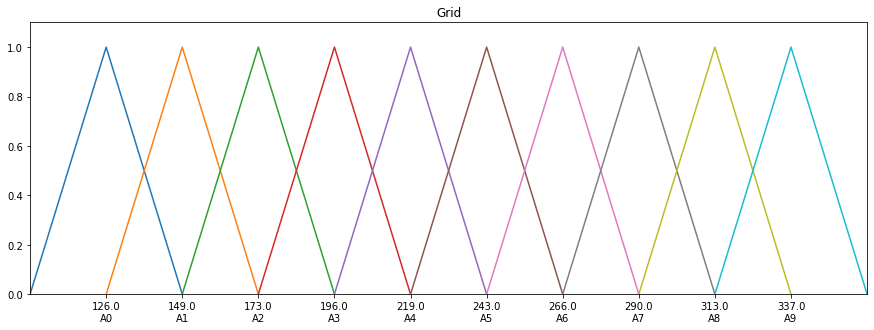

In [9]:
from pyFTS.partitioners import Grid

fs = Grid.GridPartitioner(data=data, npart=10)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

## 3. Fuzzyfication
Now we can convert the numerical values of X(t) into fuzzy values of the linguistic variable Ã,

In [10]:
# Using the method maximum, just the maximum membership fuzzy set is choosen.
#However in other FTS methods all fuzzyfied values are considered.
fuzzyfied = fs.fuzzyfy(data, method='maximum', mode='sets')
fuzzyfied

['A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A1',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A1',
 'A1',
 'A1',
 'A1',
 'A1',
 'A1',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A3',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A2',
 'A3',
 'A3',
 'A2',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',

## 4. Creating the temporal patterns
A temporal patterns indicates two fuzzy sets that appear sequentially on fuzzy time series F(t) and have the format Precedent →Consequent

In [11]:
#This entire process runs automatically within the fit function, which trains the model.

from pyFTS.common import FLR

#Using the library to show the patterns
patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)

print([str(k) for k in patterns])

['A2 -> A2', 'A2 -> A1', 'A1 -> A2', 'A1 -> A1', 'A2 -> A3', 'A3 -> A2', 'A3 -> A3', 'A3 -> A4', 'A4 -> A4', 'A4 -> A3', 'A4 -> A5', 'A5 -> A5', 'A5 -> A6', 'A6 -> A6', 'A6 -> A7', 'A7 -> A7', 'A7 -> A8', 'A8 -> A8', 'A8 -> A9', 'A9 -> A9', 'A9 -> A8', 'A8 -> A7', 'A7 -> A6', 'A6 -> A5', 'A5 -> A4']


## 5. Rule generation
Our model rules also have the format Precedent →Consequent. Given the previously generated temporal patterns we will group them by its precedents

In [12]:
from pyFTS.models import chen

#Chen Fuzzy Time Series method
model = chen.ConventionalFTS(partitioner=fs)
model.fit(data)
print(model)

Conventional FTS:
A1 -> A1,A2
A2 -> A1,A2,A3
A3 -> A2,A3,A4
A4 -> A3,A4,A5
A5 -> A4,A5,A6
A6 -> A5,A6,A7
A7 -> A6,A7,A8
A8 -> A7,A8,A9
A9 -> A8,A9



## Plot of the rules
The rule set describes how our time series behaves and, if it was stationary enough (well behaved)

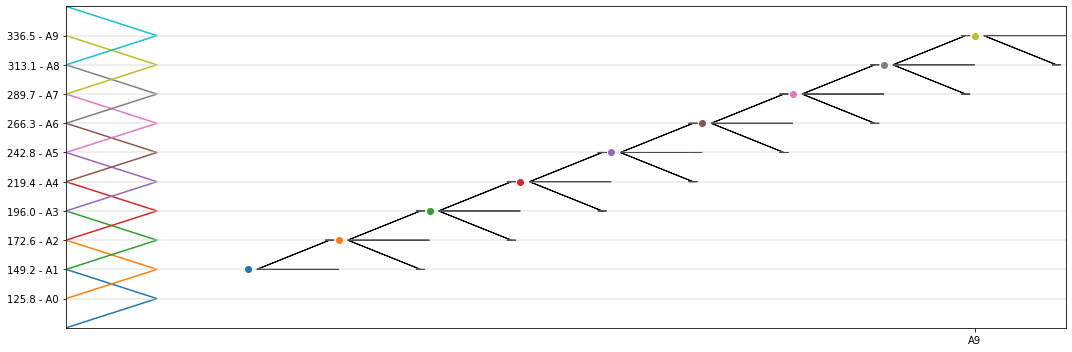

In [13]:
from pyFTS.common import Util

Util.plot_rules(model, size=[15,5], rules_by_axis=10)

## 6. Forecasting
We will predict the next day Adj Close

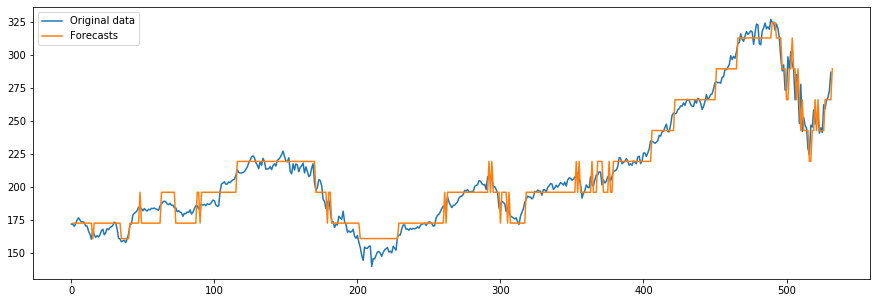

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

#Prediction of the existing data agains the fuzzy model
forecasts = model.predict(data)
forecasts.insert(0,None)

orig, = plt.plot(data, label="Original data")
pred, = plt.plot(forecasts, label="Forecasts")

plt.legend(handles=[orig, pred])

Get the last day Adj Close to predict the following day(tomorrow)

In [15]:
model.predict([data[len(data)-1]])

[289.6774652099609]

## 7. Conclusion
The predicted price and the actual price of the stock are 289 are 284 respectively. Hence, it suggests that the model works really well in predicting the stock price of next day with high accuracy rate of over 95%.